In [2]:
import pandas as pd
df=pd.read_csv('../datasets/heart_attack.csv')

In [3]:
df.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              1
troponin         0
class            0
dtype: int64

In [4]:
df_mean = df.fillna(df['kcm'].mean())
df_median = df.fillna(df['kcm'].median())
df_mode = df.fillna(df['kcm'].mode().iloc(0))

In [5]:
df_drop_row = df.dropna(axis=0)
df_drop_col = df.dropna(axis=1)

In [6]:
print(df_drop_col.isna().sum())
print(df_drop_row.isna().sum())
print(df_median.isna().sum())
print(df_mean.isna().sum())
print(df_mode.isna().sum())

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
troponin         0
class            0
dtype: int64
age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64
age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64
age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64
age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


In [7]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
knn =KNNImputer(n_neighbors=2)
simpimp = SimpleImputer(strategy='mean')
df_knn = pd.DataFrame(knn.fit_transform(df), columns=df.columns)
df_simpimp = pd.DataFrame(simpimp.fit_transform(df), columns=df.columns)

In [8]:
df_knn.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [9]:
df_simpimp.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

<h1> Detect and Handle Outliers </h1>

<Axes: >

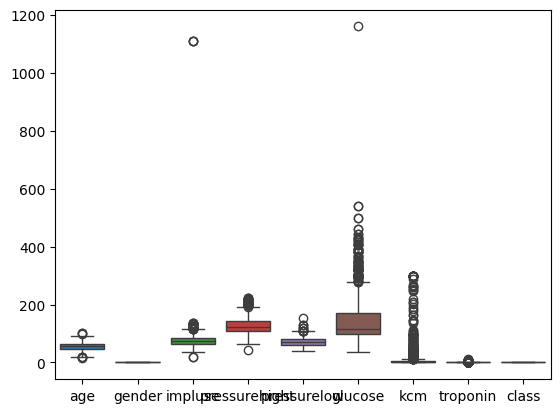

In [10]:
import seaborn as sns
sns.boxplot(df)

In [11]:
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
threshold = 1.5
IQR = Q3-Q1
outliers = df[(df['glucose']<Q1-threshold*IQR)|(df['glucose'] > Q3+IQR*threshold)]

In [12]:
outliers.index

Index([   0,    1,    4,   14,   20,   28,   31,   62,   75,   91,   93,  116,
        128,  137,  171,  182,  207,  210,  232,  235,  254,  280,  331,  333,
        336,  338,  345,  365,  381,  388,  391,  392,  393,  402,  441,  444,
        448,  489,  524,  528,  537,  560,  572,  578,  592,  593,  600,  604,
        614,  619,  639,  651,  669,  734,  773,  781,  811,  814,  825,  838,
        896,  914,  915,  931,  944,  950,  958,  960,  991, 1004, 1020, 1022,
       1045, 1057, 1066, 1100, 1111, 1136, 1139, 1161, 1164, 1183, 1209, 1260,
       1262, 1265, 1267, 1274, 1294, 1310, 1317],
      dtype='int64')

In [14]:
import numpy as np
test=df.drop(outliers.index)
df['glucose'] = np.where(df['glucose'] > threshold * IQR + Q3, threshold * IQR + Q3,
                         np.where(df['glucose'] < threshold * IQR - Q1, threshold * IQR - Q1,
                                  df['glucose']))

'''
np.where(condition, x, y): This is a NumPy function that acts as a vectorized version of the ternary expression x if condition else y. It takes three arguments:
condition: The condition to check.
x: The value to assign where the condition is True.
y: The value to assign where the condition is False.
'''

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 2 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1228 non-null   int64  
 1   gender         1228 non-null   int64  
 2   impluse        1228 non-null   int64  
 3   pressurehight  1228 non-null   int64  
 4   pressurelow    1228 non-null   int64  
 5   glucose        1228 non-null   float64
 6   kcm            1228 non-null   float64
 7   troponin       1228 non-null   float64
 8   class          1228 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 95.9 KB
